#2-3

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

In [7]:
x_train[9487].shape

(28, 28)

In [8]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

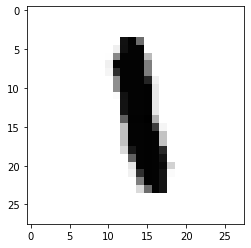

In [9]:
plt.imshow(x_train[9487], cmap='Greys')

In [10]:
y_train[9487]

1

#2-4

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#2-5

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD #from keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(10))
model.add(Activation('softmax'))

#2-6

In [22]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['accuracy']) #lr=0.1 ->learning_rate=0.1

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trai

In [24]:
#392500
784*500+500

392500

In [25]:
#25050
500*500+500

250500

In [26]:
#5010
500*10+10

5010

#2-7

In [27]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0829 - accuracy: 0.3636
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0629 - accuracy: 0.6354
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0453 - accuracy: 0.7596
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0332 - accuracy: 0.8416
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0258 - accuracy: 0.8726
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0214 - accuracy: 0.8874
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0187 - accuracy: 0.8971
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0169 - accuracy: 0.9047
Epoch 9/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0156 - accuracy: 0.9114
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0146 - accuracy: 0.9158

In [28]:
from ipywidgets import interact_manual

In [29]:
predict = model.predict_classes(x_test)
#predict_x=model.predict(x_test) 
#predict=np.argmax(predict_x)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [30]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    #print('神經網路判斷為:', predict['測試編號'])

In [31]:
interact_manual(test, 測試編號=(0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

#2-8